<a href="https://colab.research.google.com/github/Normal-case/DeepLearning/blob/master/upload_dental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array

In [2]:
print(tensorflow.keras.__version__)

2.4.0


In [3]:
TRAIN_DIR = './drive/My Drive/인공지능 큐레이터/Deep Learning/data/dental_image/train/'

In [4]:
IM_WIDTH = 220
IM_HEIGHT = 220

In [5]:
datagen = ImageDataGenerator()

In [6]:
'''
datagen.flow_from_directory() : 디렉토리에서 이미지를 읽을 객체를 생성
datagen.flow_from_directory(이미지 경로, target_size = (이미지가로, 이미지세로)\
                            batch_size = 한번에 리턴할 이미지 개수 30개, class_mode = 분류방법,\
                            shuffle = 이미지를 섞을 여부)
'''
train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (IM_WIDTH, IM_HEIGHT),
    batch_size = 20,
    class_mode = 'categorical',
    shuffle = True
)

Found 140 images belonging to 3 classes.


In [7]:
# 학습데이터의 전체 이미지 개수를 리턴
train_generator.n

140

In [8]:
# 한번에 리턴할 이미지의 개수
train_generator.batch_size

20

In [9]:
img, label = train_generator.next()
img.shape

(20, 220, 220, 3)

In [10]:
label.shape

(20, 3)

In [11]:
label_num = np.argmax(label, 1)
label_num

array([1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1])

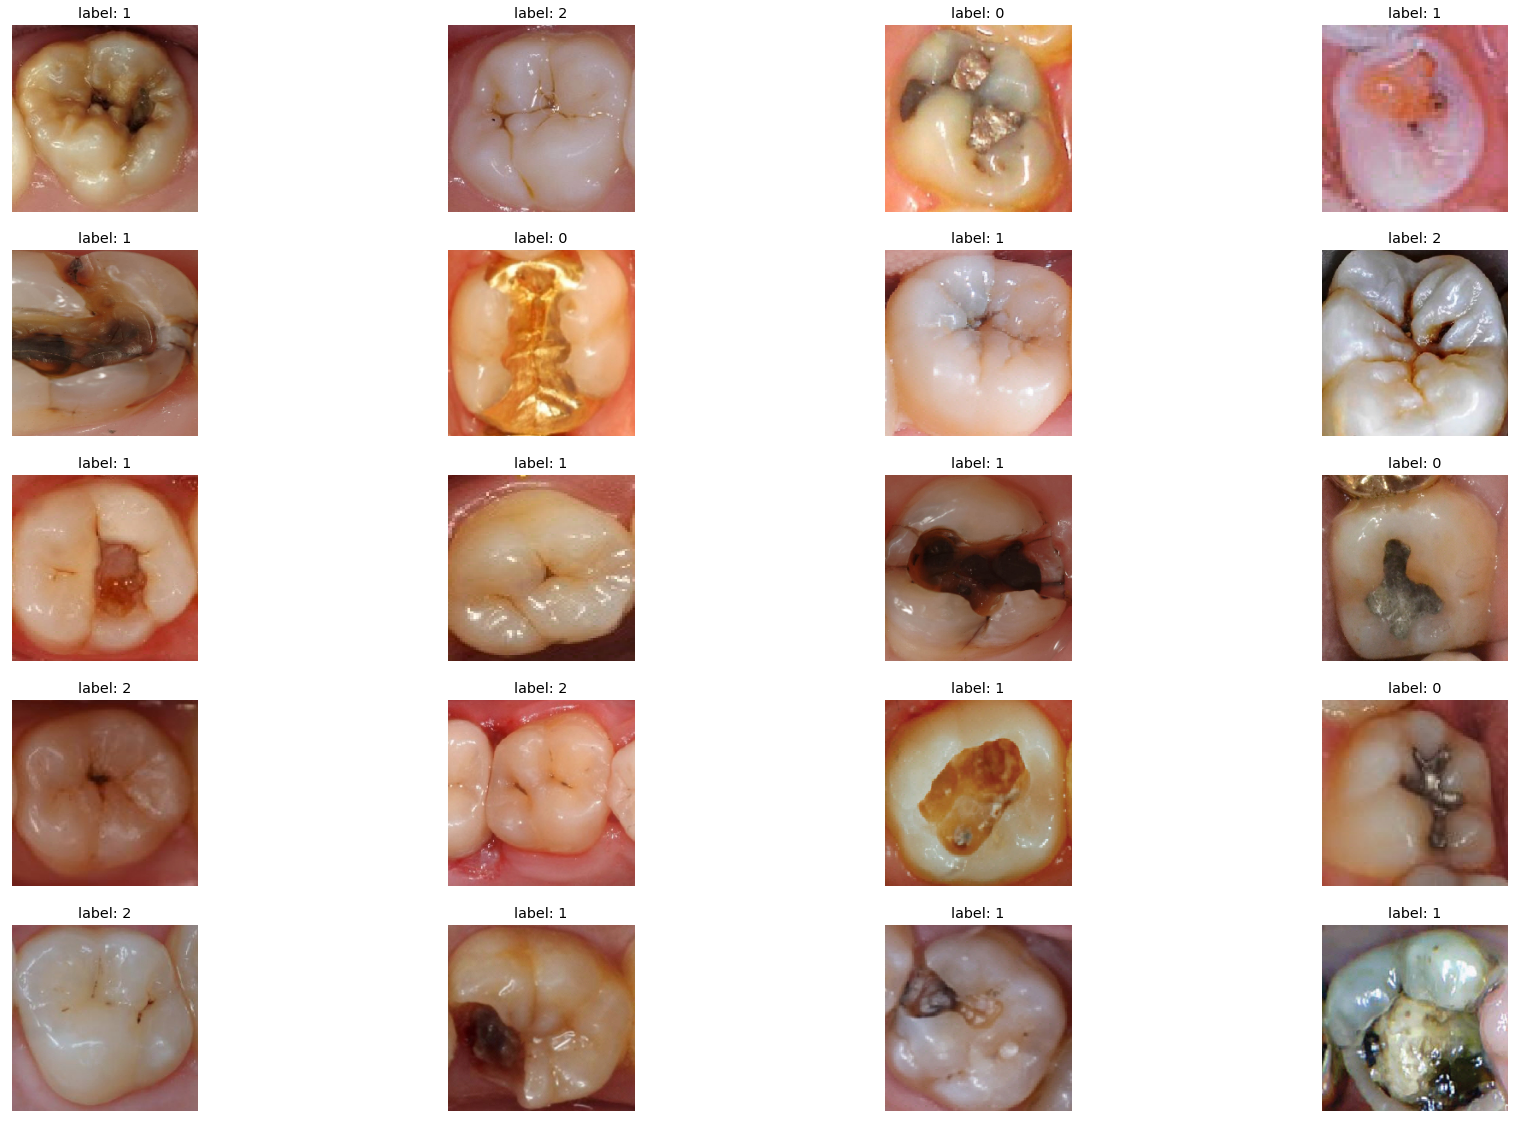

In [12]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (30, 20))
for i in range(20):
  # 5줄 4칸으로 나누고 이미지 그림
  subplot = fig.add_subplot(5, 4, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('label: %d' % label_num[i])
  # img[i]에 저장된 이미지를 255로 나눠서 0~1 사이의 데이터로 변환
  img[i] = img[i] / 255.0
  # 이미지 출력
  subplot.imshow(img[i].reshape((IM_WIDTH, IM_HEIGHT, 3)))
# 그래프를 화면에 그림
plt.show()